In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install matplotlib

In [3]:
import utils
from utils import TrainingPlot, TimeSummary, plot_training_summary
from NNKeras import NNKeras
from sklearn.model_selection import train_test_split
import inspect

Using TensorFlow backend.


## Data Preparation

### Data Cleanup
-  Merge 64 size vectors by ignoring line breaks
-  Create subset of data by selecting non consecutive vectors

#### Cleaned data
L42023,0.04347826,0.04347826,0.,0.04347826,0.01086957,0.02173913,0.,0.02173913,0.,0.,0.,0.,0.,0.02173913,0.02173913,0.04347826,0.07608696,0.02173913,0.,0.0326087,0.01086957,0.,0.,0.0326087,0.,0.01086957,0.,0.0326087,0.,0.,0.,0.0326087,0.05434783,0.,0.01086957,0.02173913,0.04347826,0.,0.01086957,0.02173913,0.02173913,0.,0.,0.01086957,0.0326087,0.,0.04347826,0.0326087,0.01086957,0.01086957,0.,0.02173913,0.04347826,0.01086957,0.,0.01086957,0.,0.,0.,0.,0.04347826,0.02173913,0.,0.

## Network 1
### Create input dataset X and y where X has all vectors and y is one-hot vector

In [4]:
nn = NNKeras("/tf/dataset/dataset.csv")
X, y, unique_classes = nn.read_data()

In [4]:
print(X.shape)
print(y.shape)
print(X[:3])
print(y[:3])

(3131, 64)
(3131, 31)
         1         2         3         4         5         6         7   \
0  0.045455  0.045455  0.000000  0.000000  0.045455  0.318182  0.000000   
1  0.080000  0.060000  0.000000  0.100000  0.000000  0.000000  0.020000   
2  0.010482  0.020964  0.002096  0.012579  0.004193  0.031447  0.006289   

         8    9         10  ...        55        56        57        58  \
0  0.000000  0.0  0.045455  ...  0.000000  0.000000  0.045455  0.000000   
1  0.000000  0.0  0.000000  ...  0.000000  0.020000  0.020000  0.040000   
2  0.006289  0.0  0.014675  ...  0.010482  0.006289  0.000000  0.010482   

        59        60        61        62        63        64  
0  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  
1  0.00000  0.000000  0.020000  0.000000  0.000000  0.000000  
2  0.02935  0.008386  0.010482  0.020964  0.012579  0.054507  

[3 rows x 64 columns]
[[ True False False False False False False False False False False False
  False False False False F

### Randomly select train, test datasets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train[:3])
print(y_train[:3])

            1         2         3         4         5         6         7   \
2113  0.000000  0.013333  0.005333  0.000000  0.000000  0.026667  0.013333   
3029  0.075269  0.043011  0.043011  0.021505  0.000000  0.010753  0.000000   
2130  0.056338  0.004695  0.000000  0.046948  0.014085  0.000000  0.004695   

            8         9         10  ...        55        56        57     58  \
2113  0.000000  0.000000  0.008000  ...  0.018667  0.002667  0.002667  0.008   
3029  0.000000  0.021505  0.000000  ...  0.010753  0.000000  0.000000  0.000   
2130  0.023474  0.009390  0.004695  ...  0.004695  0.014085  0.000000  0.000   

            59       60        61        62        63        64  
2113  0.016000  0.00000  0.000000  0.029333  0.002667  0.000000  
3029  0.010753  0.00000  0.021505  0.010753  0.010753  0.010753  
2130  0.009390  0.00939  0.042254  0.004695  0.037559  0.028169  

[3 rows x 64 columns]
[[False False False False False False False False False False False False
  Fal

In [6]:
inspect.getsourcelines(nn.train)

(['    def train(self, X, y, node_range):\n',
  '        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=5)\n',
  '        for num_nodes in node_range:\n',
  '            nodes = [64, num_nodes]\n',
  '            model = self.base_model(nodes)\n',
  '            summary = model.fit(X_train, y_train, epochs=100, verbose=0)\n',
  '            score = model.evaluate(X_test, y_test)\n',
  '            model.summary()\n',
  "            print('Test loss:', score[0])\n",
  "            print('Test accuracy:', score[1])\n"],
 51)

In [10]:
nn.train(X, y, range(1, 2))

32/32 [==============================] - 1s 22ms/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 1)                 65        
_________________________________________________________________
dense_58 (Dense)             (None, 31)                62        
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.14281681180000305
Test accuracy: 0.9677419066429138


## Network 2
### Use the training method for nodes 5 - 32

In [9]:
nn.train(X, y, range(5, 32))

32/32 [==============================] - 0s 2ms/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 325       
_________________________________________________________________
dense_4 (Dense)              (None, 31)                186       
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.1113208681344986
Test accuracy: 0.9677419066429138
32/32 [==============================] - 0s 3ms/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_6 (Dense)              (None, 31)                217       
Total params: 607
Trainable params: 607


32/32 [==============================] - 0s 15ms/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 17)                1105      
_________________________________________________________________
dense_28 (Dense)             (None, 31)                558       
Total params: 1,663
Trainable params: 1,663
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.0841558501124382
Test accuracy: 0.9697580337524414
32/32 [==============================] - 1s 18ms/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 18)                1170      
_________________________________________________________________
dense_30 (Dense)             (None, 31)                589       
Total params: 1,759
Trainable para

32/32 [==============================] - 1s 45ms/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 29)                1885      
_________________________________________________________________
dense_52 (Dense)             (None, 31)                930       
Total params: 2,815
Trainable params: 2,815
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.07098785042762756
Test accuracy: 0.9768145084381104
32/32 [==============================] - 1s 33ms/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 30)                1950      
_________________________________________________________________
dense_54 (Dense)             (None, 31)                961       
Total params: 2,911
Trainable par

### Network 2 reaches accuracy of 96% with just 2 nodes. We will take P=6

## Network 3
### Optimal number of hidden layers with P/2 neurons

In [14]:
inspect.getsourcelines(nn.train_network_3)

(['    def train_network_3(self, X, y):\n',
  '        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=5)\n',
  '        P = 6\n',
  '        for num_layers in range(1, 10):\n',
  '            nodes = [64] + [int(P / 2)] * num_layers\n',
  '            model = self.base_model(nodes)\n',
  '            summary = model.fit(X_train, y_train, epochs=10, verbose=0)\n',
  '            score = model.evaluate(X_test, y_test)\n',
  "            print('Test loss:', score[0])\n",
  "            print('Test accuracy:', score[1])\n"],
 78)

In [12]:
nn.train_network_3(X, y)

157/157 [==============================] - 1s 6ms/step
Test loss: 0.14282672553305414
Test accuracy: 0.9677418956331386
157/157 [==============================] - 1s 5ms/step
Test loss: 0.14404090318330534
Test accuracy: 0.9677418956331386
157/157 [==============================] - 1s 5ms/step
Test loss: 0.14372832370791466
Test accuracy: 0.9677418956331386
157/157 [==============================] - 1s 5ms/step
Test loss: 0.14360290528482691
Test accuracy: 0.9677418956331386
157/157 [==============================] - 1s 6ms/step
Test loss: 0.1425788419641507
Test accuracy: 0.9677418956331386
157/157 [==============================] - 1s 6ms/step
Test loss: 0.14322245586070287
Test accuracy: 0.9677418956331386
157/157 [==============================] - 1s 7ms/step
Test loss: 0.39059440896009945
Test accuracy: 0.9677418956331386
157/157 [==============================] - 1s 7ms/step
Test loss: 0.3905890295459966
Test accuracy: 0.9677418956331386
157/157 [==============================] -

### We are getting accuracy with only 2 layers. We will take hidden layers = 2

## Network 4

In [16]:
inspect.getsourcelines(nn.train_network_4)

(['    def train_network_4(self, X, y):\n',
  '        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=5)\n',
  '        for P in range(2, 12):\n',
  '            for num_layers in range(1, 5):\n',
  '                nodes = [64] + [int(P / 2)] * num_layers\n',
  '                model = self.base_model(nodes)\n',
  '                summary = model.fit(X_train, y_train, epochs=10, verbose=0)\n',
  '                score = model.evaluate(X_test, y_test)\n',
  "                print('Test loss:', score[0])\n",
  "                print('Test accuracy:', score[1])\n",
  "                print('Nodes:', P)\n"],
 89)

In [17]:
nn.train_network_4(X, y)

157/157 [==============================] - 1s 8ms/step
Test loss: 0.3905965999053542
Test accuracy: 0.9677418956331386
Nodes: 2
157/157 [==============================] - 1s 8ms/step
Test loss: 0.14581034982660016
Test accuracy: 0.9677418956331386
Nodes: 2
157/157 [==============================] - 1s 8ms/step
Test loss: 0.39057815359656217
Test accuracy: 0.9677418956331386
Nodes: 2
157/157 [==============================] - 2s 10ms/step
Test loss: 0.39060325968037746
Test accuracy: 0.9677418956331386
Nodes: 2
157/157 [==============================] - 1s 8ms/step
Test loss: 0.16229539274410076
Test accuracy: 0.9677418956331386
Nodes: 3
157/157 [==============================] - 1s 9ms/step
Test loss: 0.3905955287301616
Test accuracy: 0.9677418956331386
Nodes: 3
157/157 [==============================] - 2s 10ms/step
Test loss: 0.1440032703481662
Test accuracy: 0.9677418956331386
Nodes: 3
157/157 [==============================] - 2s 12ms/step
Test loss: 0.39061766122556796
Test accura

KeyboardInterrupt: 

In [ ]:
## Network 5
### We will use same training function with each column of y as 1D matrix
### Take average of each inidividual prediction

In [ ]:
inspect.getsourcelines(nn.train_network_4)

In [ ]:
avg_score = nn.single_output_score(X, y)
avg_score

In [ ]:
# Validation
### In this dataset, our neural network reaches accuracy of 96% with sample data and 98% with full dataset. Hence it is necessary to validate the accuracy of data with trained model.
### Keras allows callbacks for training visualization. Function below runs for 200 epochs with 32 neurons and saves the model

In [ ]:
nspect.getsourcelines(nn.train_with_callback)

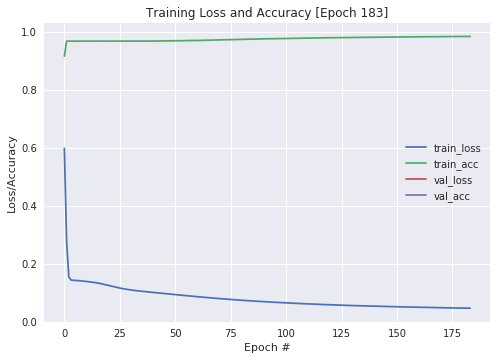

In [ ]:
nn.train_with_callback(X, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X.shape)
print(y.shape)

tmp = DecisionTreeClassifier(min_samples_leaf=10)
tmp.fit(X_train, y_train)
y_pred = tmp.predict(X_test)
print('test', accuracy_score(y_pred, y_test))
y_pred_train = tmp.predict(X_train)
print('train', accuracy_score(y_pred_train, y_train))

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
# print(pca.components_)
X_proj = pca.transform(X_test)

f, ax = plt.subplots(2, sharex=True)
f.set_figheight(10)
ax[0].scatter(X_proj[:, 0], X_proj[:, 1], c=np.argmax(y_test, axis=1), alpha=0.9)
ax[1].scatter(X_proj[:, 0], X_proj[:, 1], c=np.argmax(y_pred, axis=1), alpha=0.9)